**Data Planning Stage**

Charlie Gatley - **74748740**
DSCI_V 100-007
March 6th, 2025

Inquiry Question: 
**Question 2:** We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**(1) Data Description**

In [1]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <-  read_csv("https://raw.githubusercontent.com/CharlieGatley67/group_project/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/CharlieGatley67/group_project/refs/heads/main/sessions.csv")
players 
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


**From Assignment Criteria:** Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.

Note that the selected dataset(s) will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. You need to summarize the full data regardless of which variables you may choose to use later on.

**Answer:** The data is split into two separate .csv files, "players.csv" and "sessions.csv". The players file contains personal data on each of the 196 players tracked, with 7 different data for each player. The sessions file contains a separate observation for each time a player logs a session in the game; thus, it is much longer, with 1535 total sessions played and 5 columns tracked. In players, we see categorical variables such as gender, Age, and experience, identifying variables such as hashedEmail and name, and one numerical variable, played_hours. In sessions, a player is identified by their hashedEmail, and a session consists of start and end times. The researchers have likely hashed the emails on purpose for privacy reasons. I have a lot of assumptions about how the data were collected but very few questions, and my concern is that, if personal information was done by player-taken survey, there might be a lot of N/A values in the data.

**(2) Questions:**

**From Assignment Criteria:** Clearly state one broad question that you will address, and the specific question that you have formulated. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear. Describe clearly how the data will help you address the question of interest. You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.

**Answer:**

Inquiry Question: 

**Question 2:** We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**Specific Question:** Can played_hours predict experience in players.csv?

The reason I chose this question to investigate is because, according to common wisdom, it has an obvious answer; yes, the more hours you do something for, the better you get at it. However, this will be interesting to investigate because I'm unsure if played_hours counts all your hours in the game, or only logged hours with PlaiCraft. The classification output may not be the positive relationship we expect.

**(3) Exploratory Data Analysis and Visualization**

**From Assignment Criteria:**
In this assignment, you will:

- Demonstrate that the dataset can be loaded into R.
- Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; 
        that will happen later during the group project phase.
- Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
- Make a few exploratory visualizations of the data to help you understand it.
  - Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
  - Explain any insights you gain from these plots that are relevant to address your question

Note: do not perform any predictive analysis here. We are asking for an exploration of the relevant variables to demonstrate that you 
understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.

**Answer:**

I have already demonstrated that the dataset can be loaded.

Note: sessions is not important to the question I am answering, so it is not necessary to wrangle it.

In [3]:
# to wrangle 'players,' I simply changed some of the variables to be categorical (so we can use them for classification if we want).
players_tidy <- players |>
    mutate(experience = as.factor(experience)) |>
    mutate(gender = as.factor(gender))
players_tidy

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [4]:
mean_age <- pull(players_tidy, Age) |> mean(na.rm = TRUE)
mean_hours <- pull(players_tidy, played_hours) |> mean(na.rm = TRUE)

| Category | Mean | 
| --- | --- | 
| Age | 20.520618556701 | 
| Hours Played | 5.84591836734694 | 

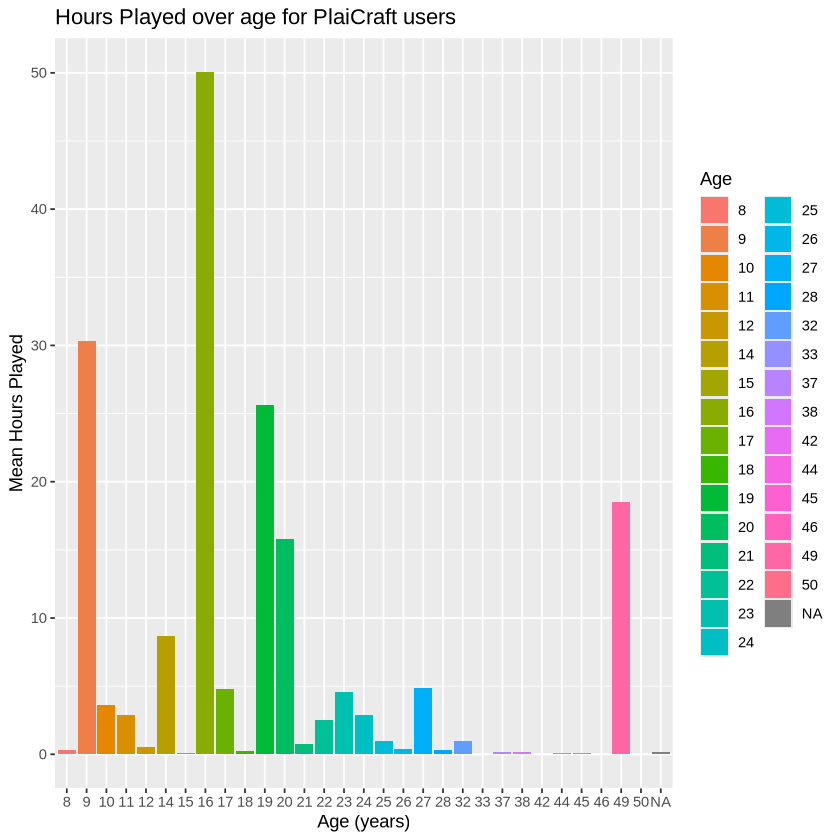

In [5]:
mean_played_by_age <- players_tidy |>
    mutate(Age = as.factor(Age)) |>
    group_by(Age) |>
    summarize(mean_played = mean(played_hours)) 

hours_vs_age_plot <- mean_played_by_age |>
    ggplot(aes(x = Age, y = mean_played, fill = Age)) +
    geom_bar(stat = "identity") +
    labs(x = "Age (years)", y = "Mean Hours Played", title = "Hours Played over age for PlaiCraft users") + 
    theme(text = element_text(size = 11))
hours_vs_age_plot

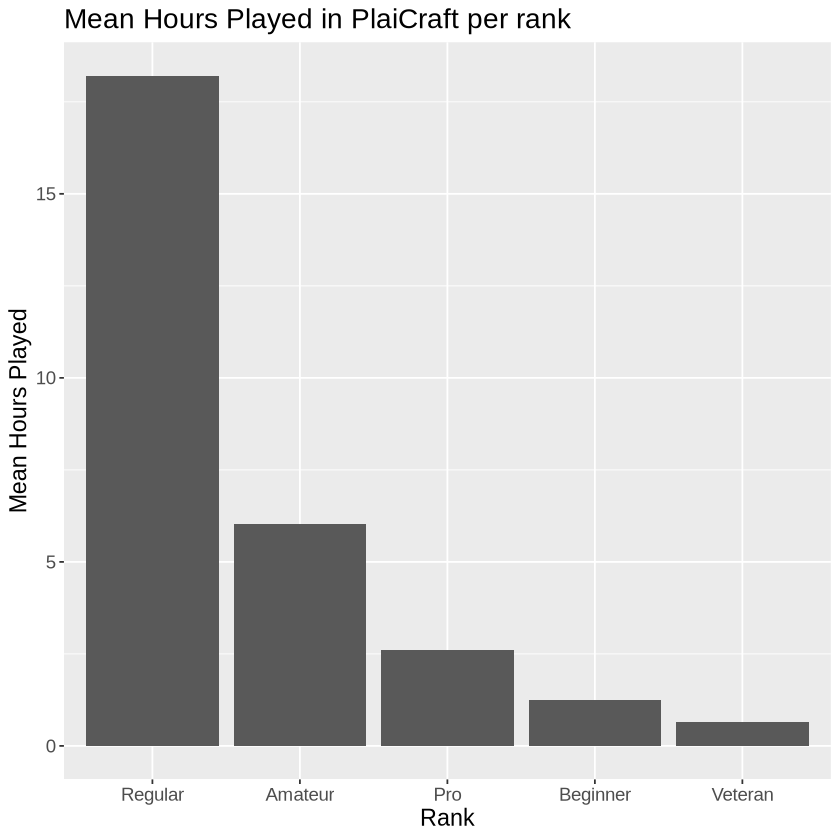

In [6]:
mean_hours_played <- players_tidy |>
    group_by(experience) |>
    summarize(mean_hours_played = mean(played_hours))

exp_vs_hrs_plot <- mean_hours_played |>
    ggplot(aes(x = fct_reorder(experience, mean_hours_played, .desc = TRUE), y = mean_hours_played)) +
    geom_bar(stat = "identity") + 
    labs(x = "Rank", y = "Mean Hours Played", title = "Mean Hours Played in PlaiCraft per rank") +
    theme(text = element_text(size = 14))
exp_vs_hrs_plot

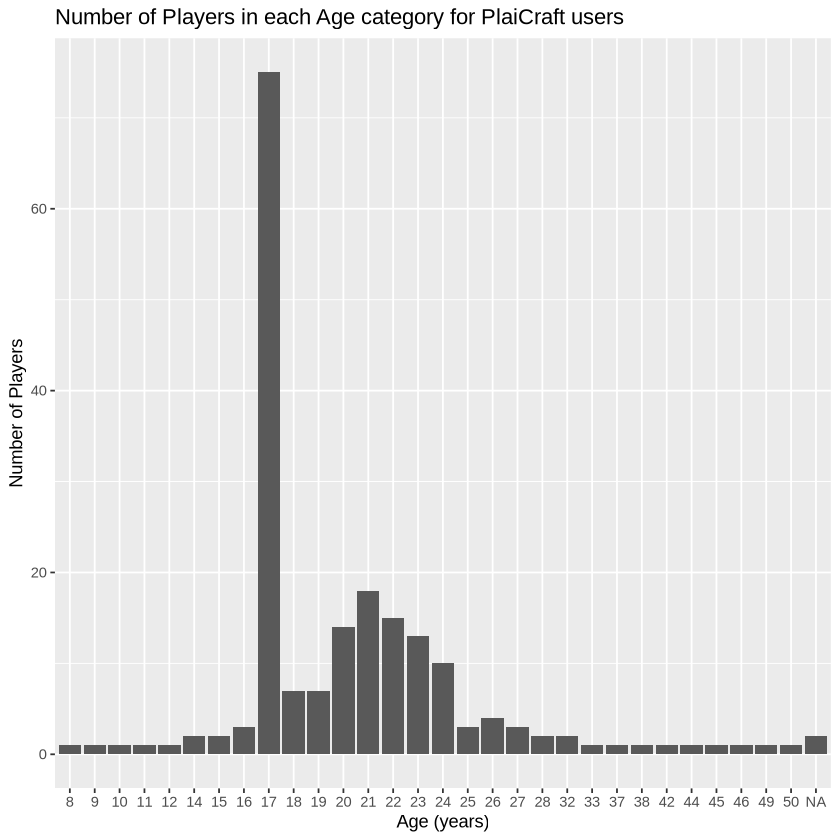

In [7]:
mean_played_by_age <- players_tidy |>
    mutate(Age = as.factor(Age)) |>
    group_by(Age) |>
    summarize(count = n()) 

hours_vs_age_plot <- mean_played_by_age |>
    ggplot(aes(x = Age, y = count)) +
    geom_bar(stat = "identity") +
    labs(x = "Age (years)", y = "Number of Players", title = "Number of Players in each Age category for PlaiCraft users") + 
    theme(text = element_text(size = 11))
hours_vs_age_plot

**Written Answer:**
Counter to my hypothesis, visualization #2 shows us that "regular" rather than "pro" gamers played by far the most on average.
I think visualizing the number of players listed in each age category is important, as we can see that 17 year-olds make up a huge percentage of the total player base. Since it is likely that age is a factor in how much one can play, understanding this variable can be useful.

**(4) Methods and Plan**

**From Assignment Criteria:**
Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

In your explanation, respond to the following questions:

- Why is this method appropriate?
- Which assumptions are required, if any, to apply the method selected?
- What are the potential limitations or weaknesses of the method selected?
- How are you going to compare and select the model?
- How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?


**Answer:**
Using 'players.csv,' I would like to use knn-classification to predict experience level based on hours played. This makes sense as a classification problem as one categorical variable, experience, is being predicted by one continuous response variable, hours played. One early limitation of this model is data tracking; since PlaiCraft didn't start when the players did, there may already be "Pro" players with very few logged hours in the game. I will split and cross-validate the data once with 75% going into the training data and 5 different v-folds. Due to the low number of observations, 'prop = x' can't be too high or we won't have accurate validation. I will, of course, tune for *k*.

Finally, and notably, if my model's accuracy is below 80%, I will add age as a response variable. This may improve accuracy as most would expect older players to have a greater experience level.